# Spaceship Titanic Classification
## Predict which passengers are transported to an alternate dimension
In this competition our task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help us make these predictions, we are given a set of personal records recovered from the ship's damaged computer system.

## Import Libraries and Load Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # file path

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
# load data
df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

## EDA - Exploratory Data Analysis

In [3]:
df.head() # first 5 entries

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.info() # infos about the samples, features and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.isnull().sum() # checking for missing values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

We have a total amount of 8693 samples, 14 features and some missing values

In [6]:
df.describe() # statistical infos about features

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
df.corr() # the correlation between the features

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


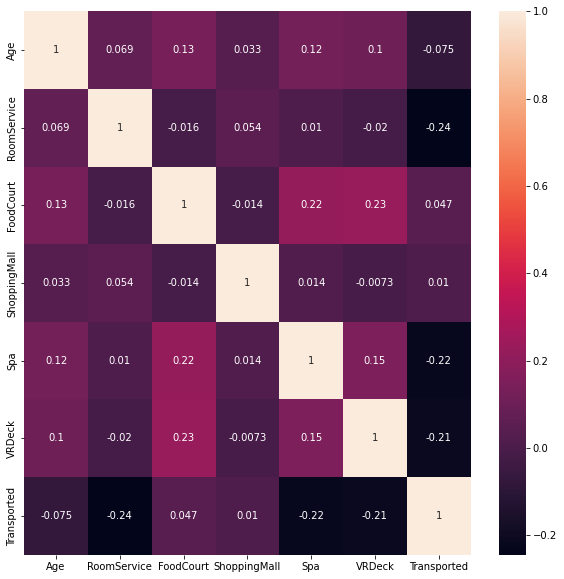

In [8]:
# Correlation of the features shown in a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

In [9]:
PassengerId = pd.DataFrame(df['PassengerId'])

## Missing Value Treatment
We are going to fill object type features with their mode value, since we have only few values missing and float types with their mean values. Only Name and Cabin columns missing values we are going to fill with 'Unknown' since the mode value would not make sense.

In [10]:
df.Name.fillna("Unkown", inplace=True) # fill names with "unknown"
df.Cabin.fillna("Unkown", inplace=True) # fill cabins with "unknown"

In [11]:
# Fill the object type columns with their mode value and numeric type columns with their mean value
df = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x.fillna(x.mean()) if x.dtype in ['float', 'int'] else x)
# This code was created with ChatGPT, thank you our new Friend :)

## Feature Engineering
We are going to replace the True and False values in the VIP and Transported column with 0 and 1 for our model.

In [12]:
df=df.replace({True: 1, False: 0}) # replace True with 1 and False with 0

We are going to delete columns, which have no impact on classifying the passengers, which are the Passenger Id, Cabin and Name columns.

In [13]:
df.drop(columns=['PassengerId', 'Cabin', 'Name'], inplace=True) # drop columns
df.shape # show shape of dataframe, we now have 11 features left

(8693, 11)

### Data Visualization and Data processing

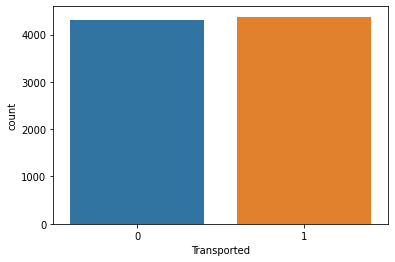

In [14]:
sns.countplot(x=df.Transported); # plot the Transported columnn

Our data is balanced, we have almost the same amount of True and False values, so we don't need to use Over- or Undersampling methods.

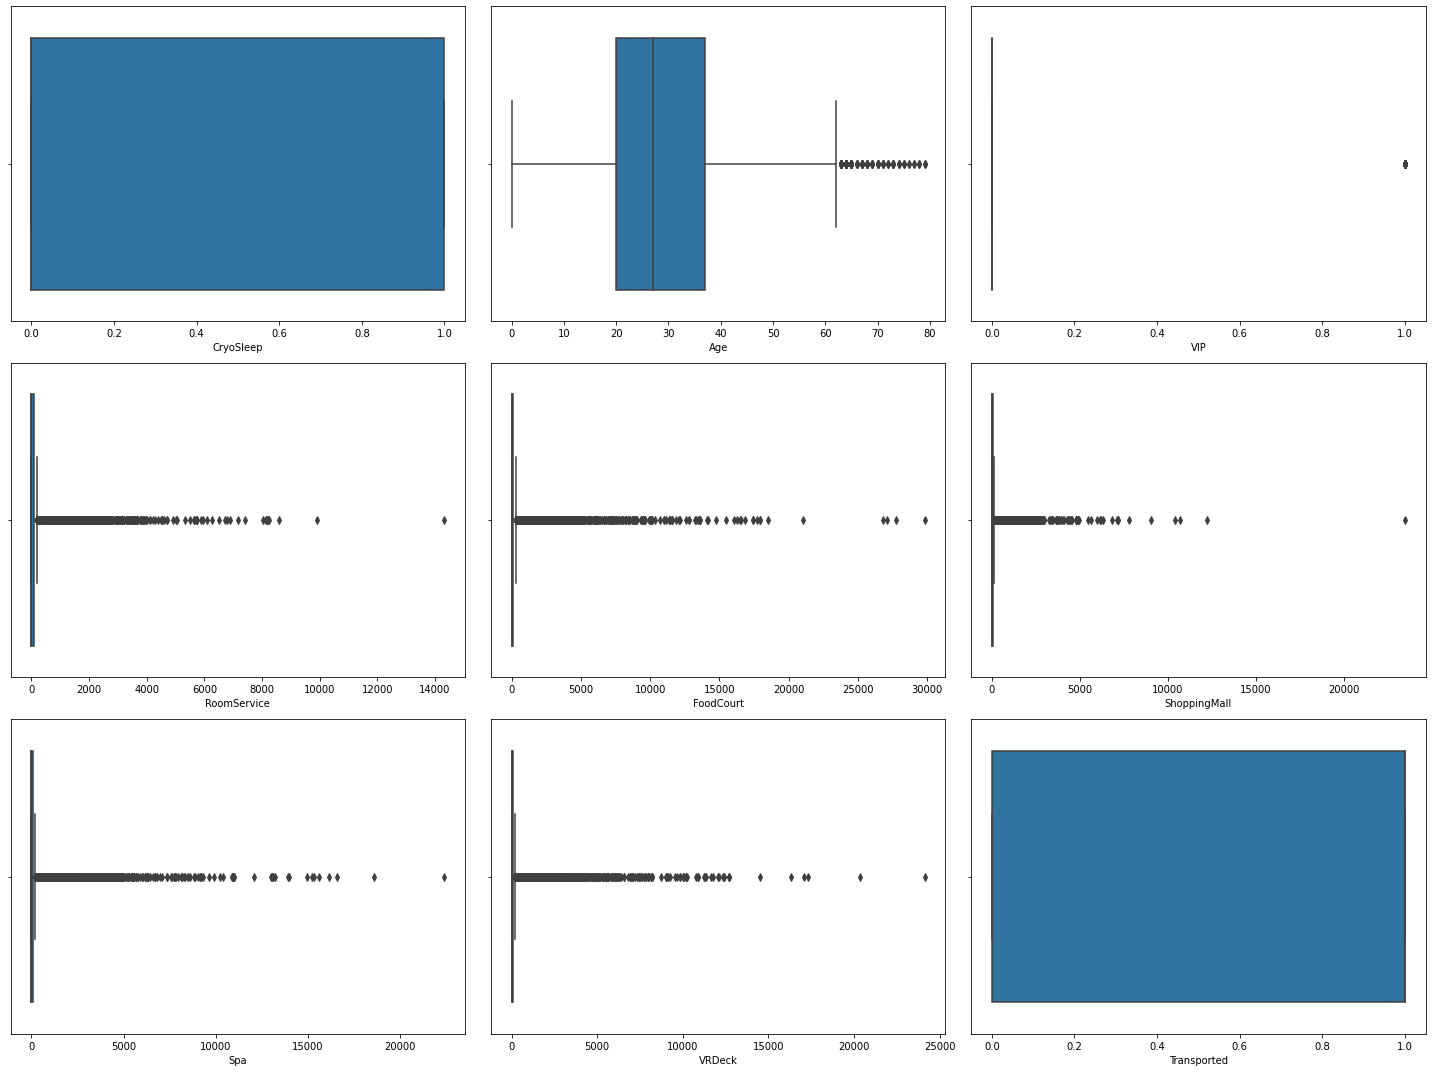

In [15]:
# Create a figure and a set of subplots with as many rows as needed and 4 columns
num_rows = (len(df.select_dtypes(include='number').columns) + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20,15))

# Create a histplot for each column in the DataFrame
for i, col in enumerate(df.select_dtypes(include='number').columns):
    sns.boxplot(data=df, x=col, ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()

We can see that our data has many outliers and the difference of min and max values are very high. So we try to detect the outliers and deal with them, so our model can perform with better results

## Outlier Treatment

In [19]:
# dealing with the outliers to gain better results
df=df[df['Age']<60]
df=df[df['RoomService']<3000]
df=df[df['FoodCourt']<5000]
df=df[df['ShoppingMall']<5000]
df=df[df['Spa']<3000]
df=df[df['VRDeck']<3000]
df.shape

(7822, 11)

## Modeling

In [20]:
# Function to call all Classification Algorithms
def classification_funct(dataset,column_to_be_studied):
    #importing Classification libraries
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.model_selection import train_test_split
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    # assign x and y, get dummies (sparse matrix - object to integer) and split data
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]    
    x=pd.get_dummies(x,drop_first=True)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    # create an instance of each classification algorithm
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
    
    # create dataframe with results
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [21]:
classification_funct(df,"Transported")  # call classification function and see results in a Dataframe

,f1_score,recall_score,precision_score,accuracy_score
LogisticRegression,0.811222,0.844282,0.780652,0.793610
RandomForestClassifier,0.794454,0.801703,0.787336,0.782109
XGBClassifier,0.800468,0.832117,0.771139,0.782109
SVC,0.802987,0.850365,0.760609,0.780831
KNeighborsClassifier,0.785203,0.800487,0.770492,0.769968
GaussianNB,0.799565,0.895377,0.722277,0.764217
BernoulliNB,0.750161,0.710462,0.794558,0.751438
DecisionTreeClassifier,0.751915,0.776156,0.729143,0.730990


The best result scored the **LogisticRegression** with **f1: 81%, recall: 84%, precision: 78% and accuracy score: 79%.** followed by the RandomForestClassifier. 

## Using Deeplearning

In [22]:
# import Deep Learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Build the model
model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # sigmoid for classification

In [24]:
#compile model
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [25]:
# assign x and y and get dummies (sparse matrix - object to integer)
x,y=df.drop("Transported",axis=1),df[["Transported"]]    
x=pd.get_dummies(x,drop_first=True)

In [26]:
model.fit(x,y,epochs=100,batch_size=50,verbose=1) # fit model

2022-12-19 19:19:24.754922: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
157/157 [==============================] - 3s 9ms/step - loss: 1.6530 - accuracy: 0.7184
Epoch 2/100
157/157 [==============================] - 1s 8ms/step - loss: 0.5748 - accuracy: 0.7478
Epoch 3/100
157/157 [==============================] - 1s 9ms/step - loss: 0.5274 - accuracy: 0.7539
Epoch 4/100
157/157 [==============================] - 1s 9ms/step - loss: 0.5173 - accuracy: 0.7557
Epoch 5/100
157/157 [==============================] - 2s 10ms/step - loss: 0.5035 - accuracy: 0.7597
Epoch 6/100
157/157 [==============================] - 1s 9ms/step - loss: 0.5035 - accuracy: 0.7572
Epoch 7/100
157/157 [==============================] - 1s 9ms/step - loss: 0.4990 - accuracy: 0.7575
Epoch 8/100
157/157 [==============================] - 1s 8ms/step - loss: 0.4911 - accuracy: 0.7632
Epoch 9/100
157/157 [==============================] - 1s 9ms/step - loss: 0.4912 - accuracy: 0.7585
Epoch 10/100
157/157 [==============================] - 1s 9ms/step - loss: 0.4936 - accur

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 795,137
Trainable params: 795,137
Non-trainable params: 0
_________________________________________________________________


In [28]:
scores=model.evaluate(x,y)

245/245 [==============================] - 1s 3ms/step - loss: 0.4245 - accuracy: 0.7988


In [29]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 79.88%


We have an **Accuracy of 79,88%** using deep learning with 100 epochs, slighlty better than our model above